## 1. Setup Dependencies

In [ ]:
!pip install opencv-python

In [ ]:
!apt-get install libopencv-dev

In [ ]:
import cv2
cv2.__version__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
DataFolder = "/content/drive/MyDrive/SDAAI/data"
TrainingImage = DataFolder + "/LU04_images/CarTrainImages"
%cd $TrainingImage 

## 2. Positive Images

In order to create out cascade, we now need to create a cars.info file which will contain the information required to train positive images.

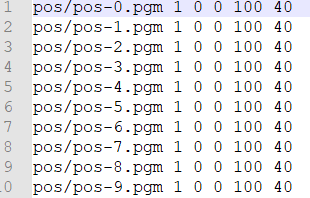



pos/pos-0.pgm → Location of our positive image.

1 → Number of objects that are in the image

0 0 100 40 → Location of image. 0 0 are the x and y coordinate and 100 40 are the width and height such that image extends from (0,0) to the width=100 and height=40.

If you have 2 or more objects, your a particular image in cars.info will become

```
pos/pos-1.pgm 2 0 0 100 40 1 1 80 60
```
For Object 1, (0,0) to Width = 100, Height =40

For Object 2, (1,1) to Width = 80, Height = 60



**cars.info** file has been created for you in CarTrainImages directory

## 3. Negative images
To describe all the negative images we simply collect their names in bg.txt file. **bg.txt** is similiarly created for you in CarTrainImages

## 4. Vec file

opencv_createsamples is used to prepare a training dataset of positive and test samples. opencv_createsamples produces dataset of positive samples in a format that is supported by both opencv_haartraining and opencv_traincascade applications. The output is a file with *.vec extension, it is a binary format which contains images.

We now create a vec file using OpenCV. In the command prompt(in the project root folder) run the following command :


```
num → number of objects that we have.
w,h → width and height of the training data that we want to create.
```



In [ ]:
!opencv_createsamples

In [ ]:
%%time
!opencv_createsamples -info cars.info -num 500 -w 48 -h 24 -vec cars.vec

If you are working on a local machine, to check the created cars.vec such that it is legit, run the following: (only for interactive terminal)

In [ ]:
# !opencv_createsamples -vec cars.vec -w 48 -h 24

## 5. Training

In order to train cascade, we will now create a directory named data and run the following:



```
The more the numStages, the more better is our model.
```



In [ ]:
%%time
!opencv_traincascade -data data -vec cars.vec -bg bg.txt -numPos 400 -numNeg 400 -numStages 10 -w 48 -h 24 -featureType LBP 

Now in our data folder, we have cascade.xml , which is our final cascade and can be used for car detection. It also contains stage wise xml files after each stage.

## 6. Detection
We can now use the cascade.xml to perform object detection of cars

In [ ]:
import cv2
from matplotlib import pyplot as plt

print ("OpenCV Version", cv2.__version__)

stop_data = cv2.CascadeClassifier("data/cascade.xml") 

In [ ]:
%pwd

In [ ]:
# Opening image 
img = cv2.imread("../CarTestImages/test-0.pgm") 

plt.imshow(img)
plt.show()

In [ ]:
found = stop_data.detectMultiScale(img, minSize =(20, 20)) 

In [ ]:
if len(found) != 0: 
      
    # There may be more than one 
    # sign in the image 
    for (x, y, width, height) in found: 
          
        # We draw a green rectangle around 
        # every recognized sign 
        cv2.rectangle(img, (x, y),  
                      (x + width, y + height),  
                      (0, 255, 0), 5) 

# Display the image          
plt.imshow(img) 
plt.show() 